<a href="https://colab.research.google.com/github/anand7771-dev/diabetes-prediction/blob/main/Disease_Prediction_from_Medical_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install xgboost (only needed once)
!pip install xgboost

# Import important Python libraries
import pandas as pd      # for data loading and analysis
import numpy as np       # for numerical operations
import matplotlib.pyplot as plt  # for charts
import seaborn as sns    # for better visualizations

# Load the dataset directly from the internet
url = "https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv"
df = pd.read_csv(url)

# Show the first 5 rows of the dataset
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
# Shape of the data
print("Shape of data:", df.shape)

# Columns (features) in the dataset
print("\nColumns in dataset:\n", df.columns.tolist())

# Data types and non-null values
print("\nInfo about dataset:")
df.info()

# Summary statistics (mean, min, max, etc.)
print("\nSummary statistics:")
print(df.describe())


Shape of data: (768, 9)

Columns in dataset:
 ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

Info about dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB

Summary statistics:
       Pregnancies     Gluc

In [3]:
# Features where 0 is invalid
invalid_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Show number of 0s in each invalid column
print("\nCount of zero values in each column:")
for col in invalid_cols:
    print(f"{col}: {(df[col] == 0).sum()}")



Count of zero values in each column:
Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11


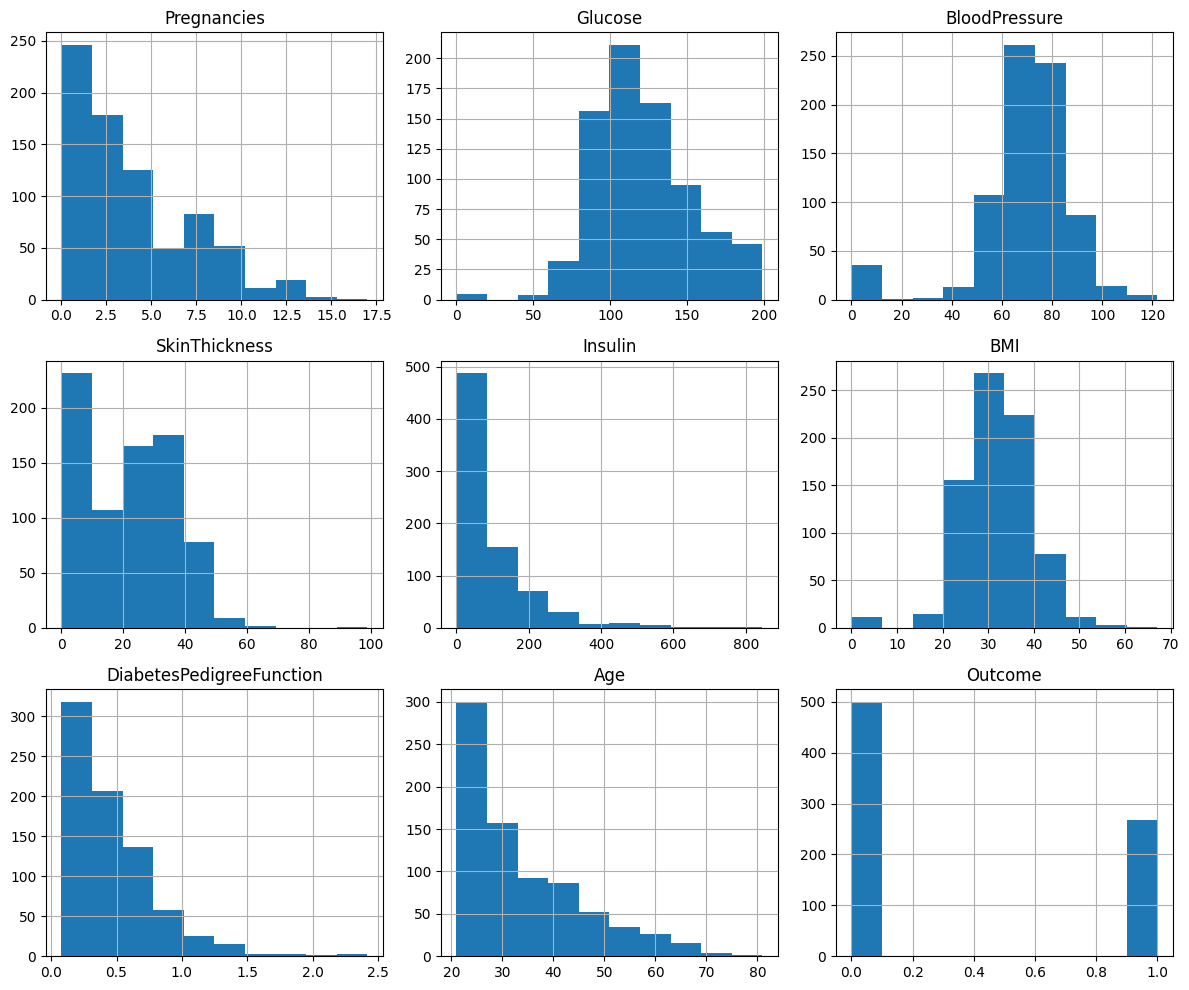

In [4]:
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()


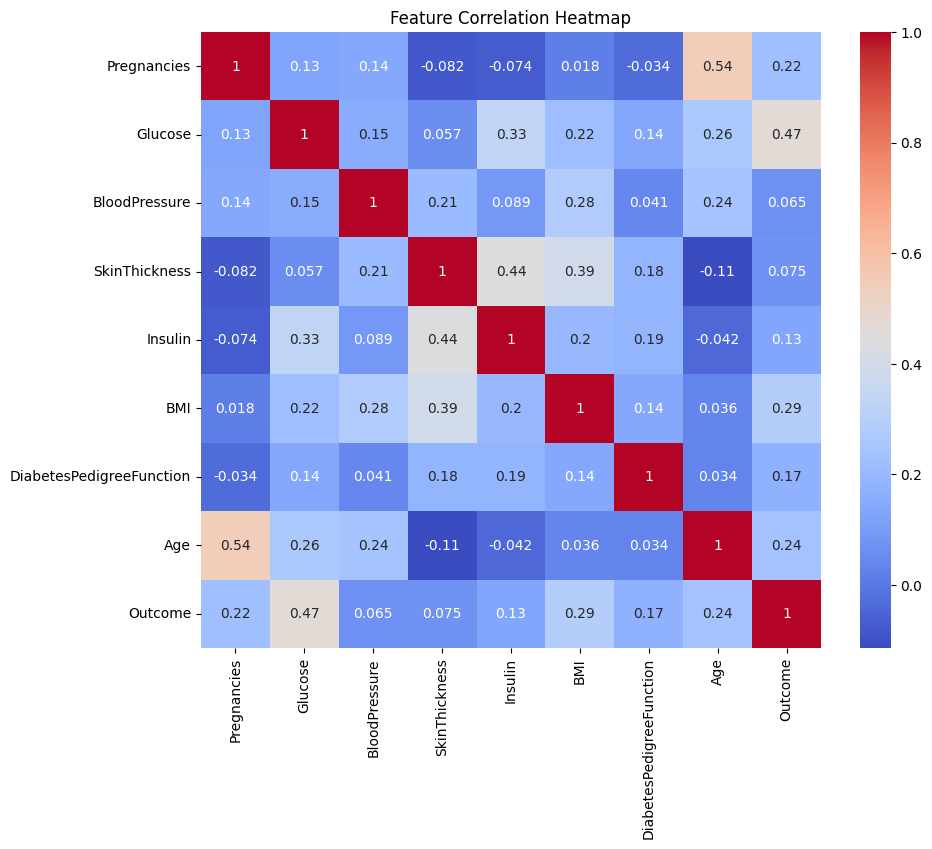

In [5]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


In [6]:
# Columns where 0 is invalid
invalid_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace 0s with the median of each column
for col in invalid_cols:
    median = df[col].median()
    df[col] = df[col].replace(0, median)


In [7]:
X = df.drop('Outcome', axis=1)  # Features
y = df['Outcome']               # Labels


In [8]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 614
Testing samples: 154


In [9]:
from sklearn.preprocessing import StandardScaler

# Create scaler object
scaler = StandardScaler()

# Fit only on training data and transform both train & test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [10]:
from sklearn.linear_model import LogisticRegression

# Create the model
log_reg = LogisticRegression()

# Train the model
log_reg.fit(X_train_scaled, y_train)


LogisticRegression()

In [11]:
# Predict on test data
y_pred = log_reg.predict(X_test_scaled)


Accuracy: 0.7662337662337663

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.83      0.82        99
           1       0.68      0.65      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.77       154



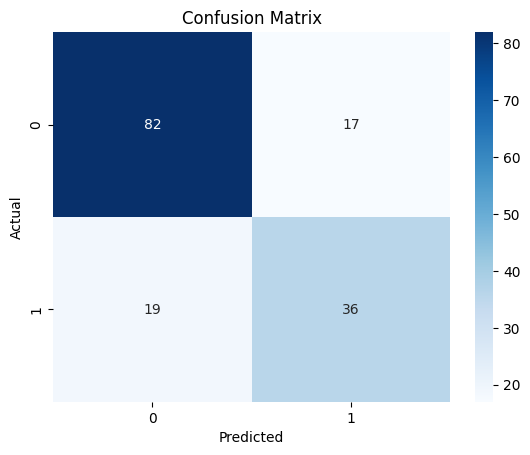

In [12]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Accuracy score
print("Accuracy:", accuracy_score(y_test, y_pred))

# Full classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [13]:
from sklearn.svm import SVC

# Create and train the model
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)

# Predict and evaluate
svm_pred = svm_model.predict(X_test_scaled)

# Accuracy and report
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print("\nSVM Classification Report:\n", classification_report(y_test, svm_pred))


SVM Accuracy: 0.7532467532467533

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.85      0.82        99
           1       0.68      0.58      0.63        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



In [14]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the model
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)

# Predict and evaluate
rf_pred = rf_model.predict(X_test_scaled)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, rf_pred))


Random Forest Accuracy: 0.7467532467532467

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.80        99
           1       0.64      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.72      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [15]:
from xgboost import XGBClassifier

# Create and train the model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_scaled, y_train)

# Predict and evaluate
xgb_pred = xgb_model.predict(X_test_scaled)

print("XGBoost Accuracy:", accuracy_score(y_test, xgb_pred))
print("\nXGBoost Classification Report:\n", classification_report(y_test, xgb_pred))


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:46:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.7207792207792207

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.76      0.78        99
           1       0.60      0.65      0.63        55

    accuracy                           0.72       154
   macro avg       0.70      0.71      0.70       154
weighted avg       0.73      0.72      0.72       154



In [16]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


In [17]:
# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Initialize model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

# Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit to training data
grid_search.fit(X_train_scaled, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 100}
Best Accuracy: 0.783406637345062


In [18]:
# Use the best model from Grid Search
best_rf = grid_search.best_estimator_

# Predict and evaluate
best_rf_pred = best_rf.predict(X_test_scaled)

from sklearn.metrics import accuracy_score, classification_report
print("Tuned Random Forest Accuracy:", accuracy_score(y_test, best_rf_pred))
print("\nClassification Report:\n", classification_report(y_test, best_rf_pred))


Tuned Random Forest Accuracy: 0.7532467532467533

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81        99
           1       0.65      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [19]:
# Randomized search (faster, randomly selects combinations)
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=10,
    scoring='accuracy',
    cv=5,
    random_state=42,
    n_jobs=-1
)
random_search.fit(X_train_scaled, y_train)


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [None, 5, 10, 20],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 150]},
                   random_state=42, scoring='accuracy')

In [20]:
# Sample patient data [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age]
sample_input = [[3, 130, 70, 25, 100, 28.0, 0.5, 40]]  # example patient

# Scale input same way as training data
sample_input_scaled = scaler.transform(sample_input)

# Predict
prediction = best_rf.predict(sample_input_scaled)

# Output result
if prediction[0] == 1:
    print("Prediction: The patient may have diabetes.")
else:
    print("Prediction: The patient is unlikely to have diabetes.")


Prediction: The patient is unlikely to have diabetes.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [22]:
import streamlit as st
import numpy as np
import pickle

# Load model and scaler
model = pickle.load(open("best_model.pkl", "rb"))
scaler = pickle.load(open("scaler.pkl", "rb"))

st.title("🩺 Diabetes Prediction App")

# Input fields
pregnancies = st.number_input("Pregnancies", 0)
glucose = st.number_input("Glucose", 0)
bp = st.number_input("Blood Pressure", 0)
skin = st.number_input("Skin Thickness", 0)
insulin = st.number_input("Insulin", 0)
bmi = st.number_input("BMI", 0.0)
dpf = st.number_input("Diabetes Pedigree Function", 0.0)
age = st.number_input("Age", 0)

if st.button("Predict"):
    input_data = np.array([[pregnancies, glucose, bp, skin, insulin, bmi, dpf, age]])
    input_scaled = scaler.transform(input_data)
    result = model.predict(input_scaled)

    st.success("The patient may have diabetes." if result[0] == 1 else "The patient is unlikely to have diabetes.")


ModuleNotFoundError: No module named 'streamlit'

In [23]:
pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 64.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 94.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.5 MB/s eta 0:00:00


In [24]:
streamlit run diabetes_app.py


SyntaxError: invalid syntax (ipython-input-298630046.py, line 1)

In [25]:
code = '''
# Paste your Streamlit code here inside triple quotes
'''
with open("diabetes_app.py", "w") as f:
    f.write(code)


In [26]:
from google.colab import files
files.download("diabetes_app.py")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [27]:
code =import streamlit as st
import numpy as np
import pickle

# Load model and scaler
model = pickle.load(open("best_model.pkl", "rb"))
scaler = pickle.load(open("scaler.pkl", "rb"))

st.title("🩺 Diabetes Prediction App")

# Input fields
pregnancies = st.number_input("Pregnancies", 0)
glucose = st.number_input("Glucose", 0)
bp = st.number_input("Blood Pressure", 0)
skin = st.number_input("Skin Thickness", 0)
insulin = st.number_input("Insulin", 0)
bmi = st.number_input("BMI", 0.0)
dpf = st.number_input("Diabetes Pedigree Function", 0.0)
age = st.number_input("Age", 0)

if st.button("Predict"):
    input_data = np.array([[pregnancies, glucose, bp, skin, insulin, bmi, dpf, age]])
    input_scaled = scaler.transform(input_data)
    result = model.predict(input_scaled)

    st.success("✅ The patient may have diabetes." if result[0] == 1 else "❌ The patient is unlikely to have diabetes.")

with open("diabetes_app.py", "w") as f:
    f.write(code)


SyntaxError: invalid syntax (ipython-input-2488395995.py, line 1)

In [28]:
code = '''
import streamlit as st
import numpy as np
import pickle

# Load model and scaler
model = pickle.load(open("best_model.pkl", "rb"))
scaler = pickle.load(open("scaler.pkl", "rb"))

st.title("🩺 Diabetes Prediction App")

# Input fields
pregnancies = st.number_input("Pregnancies", 0)
glucose = st.number_input("Glucose", 0)
bp = st.number_input("Blood Pressure", 0)
skin = st.number_input("Skin Thickness", 0)
insulin = st.number_input("Insulin", 0)
bmi = st.number_input("BMI", 0.0)
dpf = st.number_input("Diabetes Pedigree Function", 0.0)
age = st.number_input("Age", 0)

if


SyntaxError: incomplete input (ipython-input-4028510368.py, line 1)

In [29]:
code = '''
import streamlit as st
import numpy as np
import pickle

# Load model and scaler
model = pickle.load(open("best_model.pkl", "rb"))
scaler = pickle.load(open("scaler.pkl", "rb"))

st.title("🩺 Diabetes Prediction App")

# Input fields
pregnancies = st.number_input("Pregnancies", 0)
glucose = st.number_input("Glucose", 0)
bp = st.number_input("Blood Pressure", 0)
skin = st.number_input("Skin Thickness", 0)
insulin = st.number_input("Insulin", 0)
bmi = st.number_input("BMI", 0.0)
dpf = st.number_input("Diabetes Pedigree Function", 0.0)
age = st.number_input("Age", 0)

if st.button("Predict"):
    input_data = np.array([[pregnancies, glucose, bp, skin, insulin, bmi, dpf, age]])
    input_scaled = scaler.transform(input_data)
    result = model.predict(input_scaled)

    st.success("✅ The patient may have diabetes." if result[0] == 1 else "❌ The patient is unlikely to have diabetes.")
'''

# Save to file
with open("diabetes_app.py", "w") as f:
    f.write(code)


In [30]:
from google.colab import files
files.download("diabetes_app.py")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [31]:
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import pickle

# Load dataset (can also use CSV if you have one)
url = "https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv"
df = pd.read_csv(url)

# Split into features and target
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Save the model
with open("best_model.pkl", "wb") as f:
    pickle.dump(model, f)

# Save the scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("✅ Model and scaler saved!")


✅ Model and scaler saved!


In [32]:
python train_diabetes_model.py


SyntaxError: invalid syntax (ipython-input-2262203296.py, line 1)

In [33]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [34]:
!apt-get install git


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.15).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [ ]:
!git config --global user.email "ananddev4423169@gmail.com"
!git config --global user.name "Your Name"
